In [2]:
import pandas as pd
import numpy as np

In [3]:
df_1 = pd.read_csv("city.csv")
df_2 = pd.read_csv("passenger.csv")
df_3 = pd.read_csv("trip.csv")

In [4]:
df_1.head()

,id,name
0,42868,Mordor
1,42948,Erebor
2,43006,Minas Tirith
3,43020,Isengard
4,43050,Gondor


In [5]:
df_2.head()

,id,first_call_time
0,00000fab,5/11/2019 8:23:54 PM
1,0000149d,12/24/2018 9:21:33 PM
2,00002b66,9/20/2018 9:08:24 PM
3,00002bc7,7/28/2019 11:27:56 AM
4,0000332e,2/21/2019 11:34:24 PM


In [6]:
df_3.head()

,id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare
0,a84c0db2,cb64172e,2ea4359d,43006,9/8/2019 10:01:28 PM,9/8/2019 10:15:54 PM,0.3,1.92,4.36
1,a84c2d10,3034e6fe,e1bd0c8d,43006,7/1/2019 8:56:28 PM,7/1/2019 9:22:09 PM,0.0,9.36,6.91
2,a84c3e75,93fb6802,75e6d450,43050,8/20/2019 9:30:46 PM,8/20/2019 9:46:48 PM,0.0,4.39,3.48
3,a84c3f6f,25fc9273,5ba48e89,43020,9/8/2019 2:42:41 AM,9/8/2019 2:59:56 AM,0.0,2.04,1.54
4,a84c5ce2,484c4d0c,fdb2ef59,43006,6/10/2019 9:29:18 AM,6/10/2019 9:55:36 AM,0.0,7.37,5.83


In [7]:
df_trip_city = pd.merge(df_3, df_1, left_on='city_id', right_on='id', suffixes=('_trip', '_city'))
df_trip_city.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,id_city,name
0,a84c0db2,cb64172e,2ea4359d,43006,9/8/2019 10:01:28 PM,9/8/2019 10:15:54 PM,0.3,1.92,4.36,43006,Minas Tirith
1,a84c2d10,3034e6fe,e1bd0c8d,43006,7/1/2019 8:56:28 PM,7/1/2019 9:22:09 PM,0.0,9.36,6.91,43006,Minas Tirith
2,a84c5ce2,484c4d0c,fdb2ef59,43006,6/10/2019 9:29:18 AM,6/10/2019 9:55:36 AM,0.0,7.37,5.83,43006,Minas Tirith
3,a84ceb22,8f928bfa,d0bfc738,43006,6/30/2019 3:09:18 AM,6/30/2019 3:23:40 AM,0.0,4.89,5.33,43006,Minas Tirith
4,a84d29a0,69be8872,f37281fe,43006,8/11/2019 9:49:49 PM,8/11/2019 10:32:20 PM,0.0,28.14,9.76,43006,Minas Tirith


In [8]:
df_full = pd.merge(df_trip_city, df_2, left_on='passenger_id', right_on='id', suffixes=('', '_passenger'))
df_full.head()

,id_trip,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,id_city,name,id,first_call_time
0,a84c0db2,cb64172e,2ea4359d,43006,9/8/2019 10:01:28 PM,9/8/2019 10:15:54 PM,0.3,1.92,4.36,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
1,1fb90c30,c8343126,2ea4359d,43006,8/13/2019 7:49:53 AM,8/13/2019 7:58:43 AM,0.0,3.25,1.44,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
2,3c88fcf9,6880bb2a,2ea4359d,43006,9/13/2019 7:04:56 AM,9/13/2019 7:15:10 AM,0.0,2.37,2.87,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
3,a84c2d10,3034e6fe,e1bd0c8d,43006,7/1/2019 8:56:28 PM,7/1/2019 9:22:09 PM,0.0,9.36,6.91,43006,Minas Tirith,e1bd0c8d,4/16/2019 11:50:42 PM
4,d69eb4f1,3b2fe672,e1bd0c8d,43006,7/28/2019 9:07:20 AM,7/28/2019 9:34:16 AM,0.0,9.73,5.93,43006,Minas Tirith,e1bd0c8d,4/16/2019 11:50:42 PM


In [10]:
df_full = df_full.drop(columns=['passenger_id','city_id'])
df_full.head()

,id_trip,driver_id,call_time,finish_time,surge_rate,trip_distance,trip_fare,id_city,name,id,first_call_time
0,a84c0db2,cb64172e,9/8/2019 10:01:28 PM,9/8/2019 10:15:54 PM,0.3,1.92,4.36,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
1,1fb90c30,c8343126,8/13/2019 7:49:53 AM,8/13/2019 7:58:43 AM,0.0,3.25,1.44,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
2,3c88fcf9,6880bb2a,9/13/2019 7:04:56 AM,9/13/2019 7:15:10 AM,0.0,2.37,2.87,43006,Minas Tirith,2ea4359d,8/18/2018 10:56:35 AM
3,a84c2d10,3034e6fe,7/1/2019 8:56:28 PM,7/1/2019 9:22:09 PM,0.0,9.36,6.91,43006,Minas Tirith,e1bd0c8d,4/16/2019 11:50:42 PM
4,d69eb4f1,3b2fe672,7/28/2019 9:07:20 AM,7/28/2019 9:34:16 AM,0.0,9.73,5.93,43006,Minas Tirith,e1bd0c8d,4/16/2019 11:50:42 PM


**BASIC: Cek Anomali**  
**- Negative values pada fare dan distance**  
**- More Than 1 Trip on same time (both passenger and trip)**  
**- Strange/Irregular trip (by distance and fare)**  
**- Missing Values**

In [13]:
# 1. Negative values pada fare dan distance
negative_fare = df_full[df_full['trip_fare'] < 0]
negative_distance = df_full[df_full['trip_distance'] < 0]

In [22]:
# 2. More Than 1 Trip on same time (both passenger and trip)
df_full['call_time'] = pd.to_datetime(df_full['call_time'])
df_full['finish_time'] = pd.to_datetime(df_full['finish_time'])

duplicate_times = df_full[df_full.duplicated(subset=['call_time', 'finish_time'], keep=False)]

# Output hasil
print("Duplicate Call and Finish Times:")
print(duplicate_times[['call_time', 'finish_time', 'id', 'driver_id']].drop_duplicates())

Duplicate Call and Finish Times:
                  call_time         finish_time        id driver_id
3168    2019-05-15 21:38:16 2019-05-15 21:52:15  26018b36  1a88dcba
3893    2019-09-20 08:00:00 2019-09-20 08:09:07  2ec31dc6  39c7bcc8
4861    2019-07-23 23:51:43 2019-07-24 00:04:50  80821f5f  2e1432a4
10543   2019-09-03 18:29:45 2019-09-03 18:53:37  e1ba4365  258b896a
18555   2019-08-02 08:19:03 2019-08-02 08:31:10  4c91ace3  15762c24
...                     ...                 ...       ...       ...
2268562 2019-06-12 21:44:12 2019-06-12 22:01:46  4c0b8faf  c205e2b2
2274428 2019-05-20 07:07:54 2019-05-20 07:31:49  11015b58  691a4470
2289450 2019-07-16 07:16:22 2019-07-16 07:36:02  927cb5b3  49b284ff
2302809 2019-06-09 07:26:51 2019-06-09 07:44:15  bc917c4d  ccba9554
2309359 2019-07-09 01:55:29 2019-07-09 02:05:43  8cf2f38a  96cf563c

[310 rows x 4 columns]


In [15]:
# 3. Strange/Irregular trip (by distance and fare)
distance_threshold = (df_full['trip_distance'].quantile(0.01), df_full['trip_distance'].quantile(0.99))
fare_threshold = (df_full['trip_fare'].quantile(0.01), df_full['trip_fare'].quantile(0.99))

strange_trips_distance = df_full[(df_full['trip_distance'] < distance_threshold[0]) | (df_full['trip_distance'] > distance_threshold[1])]
strange_trips_fare = df_full[(df_full['trip_fare'] < fare_threshold[0]) | (df_full['trip_fare'] > fare_threshold[1])]

In [32]:
# Output results
print("Strange Trips by Distance:")
print(strange_trips_distance[['trip_distance', 'trip_fare', 'call_time', 'finish_time', 'id', 'driver_id']].drop_duplicates())

Strange Trips by Distance:
         trip_distance  trip_fare           call_time         finish_time  \
11               28.14       9.76 2019-08-11 21:49:49 2019-08-11 22:32:20   
152              36.29      26.75 2019-08-16 18:18:42 2019-08-16 19:16:03   
163              30.68      23.13 2019-08-16 04:07:18 2019-08-16 05:03:41   
250              29.40      24.41 2019-05-07 10:31:59 2019-05-07 11:11:44   
251               0.10       3.21 2019-05-08 10:32:38 2019-05-08 10:42:01   
...                ...        ...                 ...                 ...   
2318174          -0.03       1.48 2019-07-08 23:09:06 2019-07-08 23:22:05   
2318184          30.33      13.65 2019-09-23 16:07:08 2019-09-23 17:01:17   
2318211          31.08      21.53 2019-05-05 06:03:11 2019-05-05 07:18:41   
2318217          -0.46       2.84 2019-08-04 01:04:49 2019-08-04 01:41:51   
2318353          -0.12       2.27 2019-07-01 04:40:16 2019-07-01 04:44:53   

               id driver_id  
11       f37281fe 

In [26]:
print("\nStrange Trips by Fare:")
print(strange_trips_fare[['trip_distance', 'trip_fare', 'call_time', 'finish_time', 'id', 'driver_id']].drop_duplicates())


Strange Trips by Fare:
         trip_distance  trip_fare           call_time         finish_time  \
59                1.97       1.25 2019-08-09 08:32:44 2019-08-09 08:40:56   
152              36.29      26.75 2019-08-16 18:18:42 2019-08-16 19:16:03   
163              30.68      23.13 2019-08-16 04:07:18 2019-08-16 05:03:41   
177              25.63      21.30 2019-08-26 06:02:11 2019-08-26 06:49:33   
233               1.73       1.16 2019-09-07 12:24:02 2019-09-07 12:32:00   
...                ...        ...                 ...                 ...   
2318093           0.80       1.23 2019-05-08 08:57:48 2019-05-08 09:07:06   
2318211          31.08      21.53 2019-05-05 06:03:11 2019-05-05 07:18:41   
2318256           1.73       1.21 2019-08-23 09:03:57 2019-08-23 09:17:50   
2318328           1.50       1.23 2019-08-21 18:12:22 2019-08-21 18:19:34   
2318346          24.06      23.66 2019-05-06 07:49:43 2019-05-06 08:36:24   

               id driver_id  
59       b412e39d  51

In [27]:
# 4. Missing Values
df_full.isnull().sum()

id_trip                0
driver_id              0
call_time              0
finish_time            0
surge_rate             6
trip_distance      23239
trip_fare              0
id_city                0
name                   0
id                     0
first_call_time        0
dtype: int64

**Basic Question:**  
**- Hubungan antara trip, fare, surge rate, dan city...?**

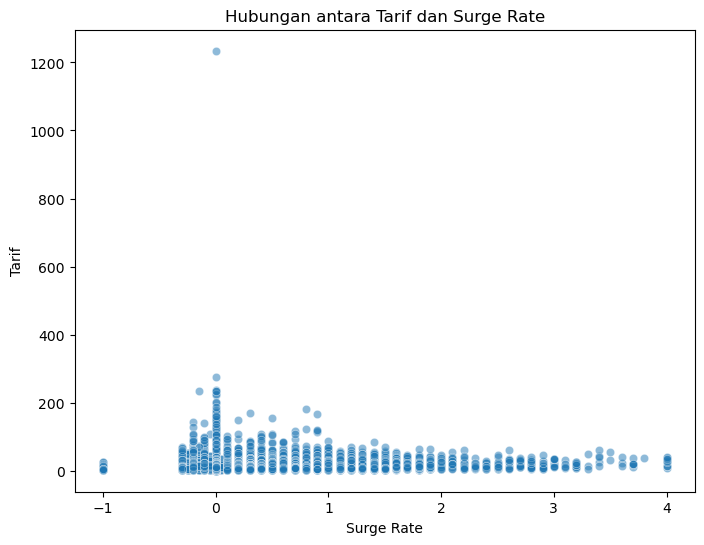

In [34]:
# Plot relationship between trip fare and surge rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_full, x='surge_rate', y='trip_fare', alpha=0.5)
plt.title('Hubungan antara Tarif dan Surge Rate')
plt.xlabel('Surge Rate')
plt.ylabel('Tarif')
plt.show()

- Setiap titik pada scatter plot ini mewakili satu perjalanan (trip). Sumbu horizontal (x) adalah surge_rate, sedangkan sumbu vertikal (y) adalah trip_fare.
- Jika ada hubungan positif, kita akan melihat bahwa ketika surge_rate meningkat, trip_fare juga cenderung meningkat. Ini masuk akal karena surge_rate berfungsi sebagai pengali yang menaikkan tarif ketika permintaan tinggi.

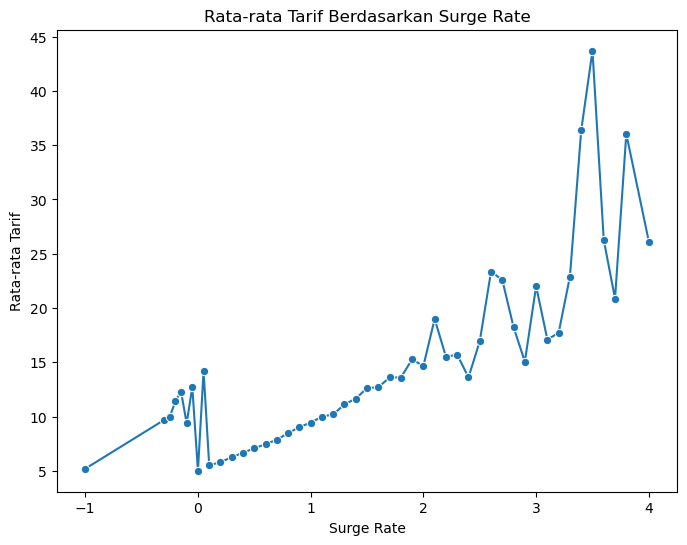

In [35]:
# Calculate average fare per surge rate
avg_fare_per_surge = df_full.groupby('surge_rate')['trip_fare'].mean().reset_index()

# Plot average fare per surge rate
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_fare_per_surge, x='surge_rate', y='trip_fare', marker='o')
plt.title('Rata-rata Tarif Berdasarkan Surge Rate')
plt.xlabel('Surge Rate')
plt.ylabel('Rata-rata Tarif')
plt.show()

-  Plot ini menunjukkan tren rata-rata tarif seiring dengan perubahan surge_rate. Jika garis ini menunjukkan kenaikan, itu berarti tarif perjalanan cenderung lebih tinggi saat surge_rate meningkat.

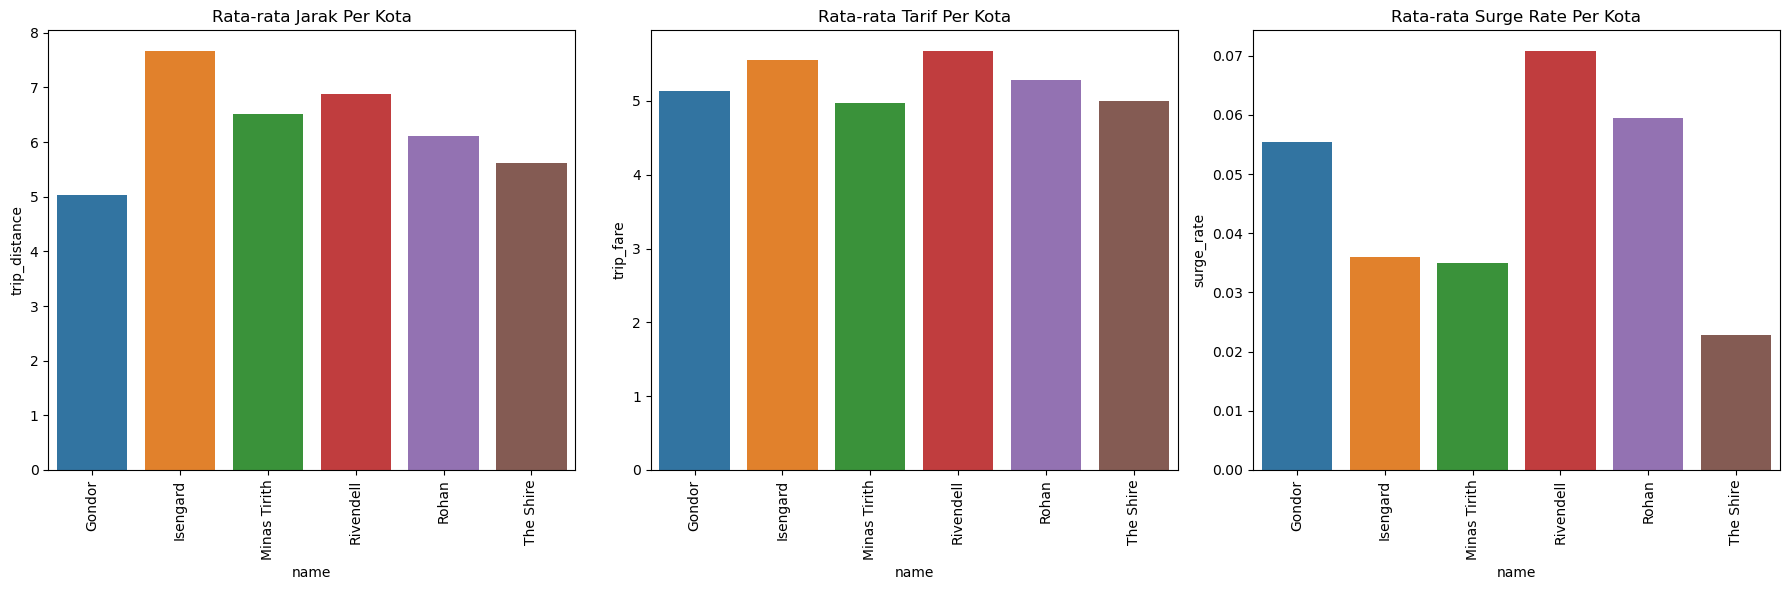

In [36]:
# Aggregate data for each city
city_summary = df_full.groupby('name').agg({
    'trip_distance': 'mean',
    'trip_fare': 'mean',
    'surge_rate': 'mean'
}).reset_index()

# Plot summary statistics
plt.figure(figsize=(18, 6))

# Plot mean distance
plt.subplot(1, 3, 1)
sns.barplot(data=city_summary, x='name', y='trip_distance')
plt.xticks(rotation=90)
plt.title('Rata-rata Jarak Per Kota')

# Plot mean fare
plt.subplot(1, 3, 2)
sns.barplot(data=city_summary, x='name', y='trip_fare')
plt.xticks(rotation=90)
plt.title('Rata-rata Tarif Per Kota')

# Plot mean surge rate
plt.subplot(1, 3, 3)
sns.barplot(data=city_summary, x='name', y='surge_rate')
plt.xticks(rotation=90)
plt.title('Rata-rata Surge Rate Per Kota')

plt.tight_layout()
plt.show()

**1. Insight dari Bar Chart 1 (Rata-rata Jarak Per Kota)**
- Kota seperti Isengard mungkin memiliki lebih banyak perjalanan jarak jauh dibandingkan kota lainnya, sedangkan Gondor cenderung memiliki perjalanan yang lebih pendek.
- Perbedaan dalam rata-rata jarak ini bisa disebabkan oleh faktor geografis, kepadatan kota, atau pola penggunaan transportasi.

**2. Insight dari Bar Chart 2 (Rata-rata Tarif Per Kota)**
- Isengard dan Rivendell tidak hanya memiliki jarak perjalanan yang panjang, tetapi juga tarif yang lebih tinggi, yang mungkin disebabkan oleh kebijakan harga lokal atau kondisi permintaan tinggi.
- Kota-kota seperti Minas Tirith dan The Shire cenderung memiliki tarif yang lebih rendah, mungkin karena perjalanan yang lebih singkat atau lebih sedikit kejadian surge pricing.

**3. Insight dari Bar Chart 3 (Rata-rata Surge Rate Per Kota)**
- Rivendell tampaknya menjadi kota dengan kondisi transportasi yang paling tidak stabil, sering mengalami surge pricing yang mungkin disebabkan oleh tingginya permintaan layanan.
- The Shire jarang mengalami surge pricing, yang bisa berarti kota ini memiliki permintaan yang lebih stabil atau pasokan transportasi yang mencukupi untuk mengatasi fluktuasi permintaan.